# Time operations

Time operations are notoriously difficult. In this notebook we go through some of scmdata's time operation capabilities.

## Imports

In [1]:
# NBVAL_IGNORE_OUTPUT
import datetime as dt
import traceback

import scmdata.time
import scmdata.errors
from scmdata import ScmRun, run_append

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

/Users/jared/code/uom/scmdata/src/scmdata/database/_database.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


In [2]:
import pandas as pd

pd.set_option("display.width", 120)
pd.set_option("display.max_columns", 15)
pd.set_option("display.max_colwidth", 80)
pd.set_option("display.min_rows", 20)

## Data

Here we use the RCP26 emissions data. This originally came from http://www.pik-potsdam.de/~mmalte/rcps/ and has since been re-written into a format which can be read by scmdata using the [pymagicc](https://github.com/openclimatedata/pymagicc) library. We are not currently planning on importing Pymagicc's readers into scmdata by default, please raise an issue [here](https://github.com/openscm/scmdata/issues) if you would like us to consider doing so.

In [3]:
var_to_plot = "Emissions|BC"

rcp26 = ScmRun("rcp26_emissions.csv")
rcp26["time operation"] = "raw"

/Users/jared/code/uom/scmdata/src/scmdata/plotting.py:96: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.lineplot(data=plt_df, **kwargs)


<AxesSubplot:xlabel='time', ylabel='Mt BC / yr'>

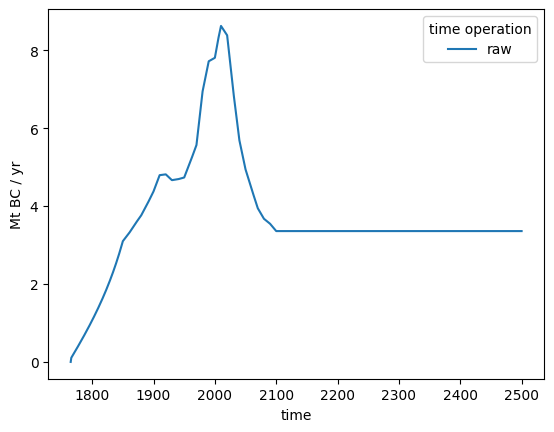

In [4]:
rcp26.filter(variable=var_to_plot).lineplot(hue="time operation")

For illustrative purposes, we shift the time points of the raw data before moving on.

In [5]:
rcp26["time"] = rcp26["time"].map(lambda x: dt.datetime(x.year, 3, 17))
rcp26 = ScmRun(rcp26)
rcp26.head()

time                                                                1765-03-17 00:00:00  1766-03-17 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    raw            Mt BC / yr    Emissions|BC                0.000000             0.106998   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010763             0.010752   

time                                                                1767-03-17 00:00:00  1768-03-17 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    raw            Mt BC / yr    Emissions|BC                0.133383             0.159847   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010748             0.010744   

time                                                                1769-03-17 00:00:00  1770-03-17 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    raw            Mt BC / yr    Emissions|BC                0.186393             0.213024   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010740             0.010736   

time                                                                1771-03-17 00:00:00  ...  2494-03-17 00:00:00  \
model region scenario time operation unit          variable                              ...                        
IMAGE World  RCP26    raw            Mt BC / yr    Emissions|BC                0.239742  ...               3.3578   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000  ...               0.0857   
                                     kt C6F14 / yr Emissions|C6F14             0.000000  ...               0.0887   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000  ...               0.0000   
                                     kt CF4 / yr   Emissions|CF4               0.010731  ...               1.0920   

time                                                                2495-03-17 00:00:00  2496-03-17 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    raw            Mt BC / yr    Emissions|BC                  3.3578               3.3578   
                                     kt C2F6 / yr  Emissions|C2F6                0.0857               0.0857   
                                     kt C6F14 / yr Emissions|C6F14               0.0887               0.0887   
                                     kt CCl4 / yr  Emissions|CCl4                0.0000               0.0000   
                                     kt CF4 / yr   Emissions|CF4                 1.0920               1.0920   

time                                    

## Resampling

The first method to consider is `resample`. This allows us to resample a dataframe onto different timesteps. Below, we resample the data onto monthly timesteps.

In [6]:
rcp26_monthly = rcp26.resample("MS")
rcp26_monthly["time operation"] = "start of month"
rcp26_monthly.head()

time                                                                1765-03-01 00:00:00  1765-04-01 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    start of month Mt BC / yr    Emissions|BC               -0.004690             0.004397   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010763             0.010762   

time                                                                1765-05-01 00:00:00  1765-06-01 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    start of month Mt BC / yr    Emissions|BC                0.013192             0.022279   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010761             0.010761   

time                                                                1765-07-01 00:00:00  1765-08-01 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    start of month Mt BC / yr    Emissions|BC                0.031073             0.040161   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010760             0.010759   

time                                                                1765-09-01 00:00:00  ...  2499-10-01 00:00:00  \
model region scenario time operation unit          variable                              ...                        
IMAGE World  RCP26    start of month Mt BC / yr    Emissions|BC                0.049248  ...               3.3578   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000  ...               0.0857   
                                     kt C6F14 / yr Emissions|C6F14             0.000000  ...               0.0887   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000  ...               0.0000   
                                     kt CF4 / yr   Emissions|CF4               0.010758  ...               1.0920   

time                                                                2499-11-01 00:00:00  2499-12-01 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    start of month Mt BC / yr    Emissions|BC                  3.3578               3.3578   
                                     kt C2F6 / yr  Emissions|C2F6                0.0857               0.0857   
                                     kt C6F14 / yr Emissions|C6F14               0.0887               0.0887   
                                     kt CCl4 / yr  Emissions|CCl4                0.0000               0.0000   
                                     kt CF4 / yr   Emissions|CF4                 1.0920               1.0920   

time                                    

We can also resample to e.g. start of year or end of year.

In [7]:
rcp26_end_of_year = rcp26.resample("A")
rcp26_end_of_year["time operation"] = "end of year"
rcp26_end_of_year.head()

time                                                                1764-12-31 00:00:00  1765-12-31 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    end of year    Mt BC / yr    Emissions|BC               -0.022279             0.084719   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010765             0.010754   

time                                                                1766-12-31 00:00:00  1767-12-31 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    end of year    Mt BC / yr    Emissions|BC                0.127889             0.154279   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010749             0.010745   

time                                                                1768-12-31 00:00:00  1769-12-31 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    end of year    Mt BC / yr    Emissions|BC                0.180866             0.207479   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010741             0.010736   

time                                                                1770-12-31 00:00:00  ...  2494-12-31 00:00:00  \
model region scenario time operation unit          variable                              ...                        
IMAGE World  RCP26    end of year    Mt BC / yr    Emissions|BC                0.234178  ...               3.3578   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000  ...               0.0857   
                                     kt C6F14 / yr Emissions|C6F14             0.000000  ...               0.0887   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000  ...               0.0000   
                                     kt CF4 / yr   Emissions|CF4               0.010732  ...               1.0920   

time                                                                2495-12-31 00:00:00  2496-12-31 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    end of year    Mt BC / yr    Emissions|BC                  3.3578               3.3578   
                                     kt C2F6 / yr  Emissions|C2F6                0.0857               0.0857   
                                     kt C6F14 / yr Emissions|C6F14               0.0887               0.0887   
                                     kt CCl4 / yr  Emissions|CCl4                0.0000               0.0000   
                                     kt CF4 / yr   Emissions|CF4                 1.0920               1.0920   

time                                    

In [8]:
rcp26_start_of_year = rcp26.resample("AS")
rcp26_start_of_year["time operation"] = "start of year"
rcp26_start_of_year.head()

time                                                                1765-01-01 00:00:00  1766-01-01 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    start of year  Mt BC / yr    Emissions|BC               -0.021986             0.085012   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010765             0.010754   

time                                                                1767-01-01 00:00:00  1768-01-01 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    start of year  Mt BC / yr    Emissions|BC                0.127961             0.154351   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010749             0.010745   

time                                                                1769-01-01 00:00:00  1770-01-01 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    start of year  Mt BC / yr    Emissions|BC                0.180938             0.207552   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010741             0.010736   

time                                                                1771-01-01 00:00:00  ...  2495-01-01 00:00:00  \
model region scenario time operation unit          variable                              ...                        
IMAGE World  RCP26    start of year  Mt BC / yr    Emissions|BC                0.234252  ...               3.3578   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000  ...               0.0857   
                                     kt C6F14 / yr Emissions|C6F14             0.000000  ...               0.0887   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000  ...               0.0000   
                                     kt CF4 / yr   Emissions|CF4               0.010732  ...               1.0920   

time                                                                2496-01-01 00:00:00  2497-01-01 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    start of year  Mt BC / yr    Emissions|BC                  3.3578               3.3578   
                                     kt C2F6 / yr  Emissions|C2F6                0.0857               0.0857   
                                     kt C6F14 / yr Emissions|C6F14               0.0887               0.0887   
                                     kt CCl4 / yr  Emissions|CCl4                0.0000               0.0000   
                                     kt CF4 / yr   Emissions|CF4                 1.0920               1.0920   

time                                    

## Interpolating

Not all time points are supported by resampling. If we want to use custom time points (e.g. middle of year), we can do that with interpolate.

In [9]:
rcp26_middle_of_year = rcp26.interpolate(
    target_times=sorted(
        [dt.datetime(v, 7, 1) for v in set([v.year for v in rcp26["time"]])]
    )
)
rcp26_middle_of_year["time operation"] = "middle of year"
rcp26_middle_of_year.head()

time                                                                1765-07-01 00:00:00  1766-07-01 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    middle of year Mt BC / yr    Emissions|BC                0.031073             0.114660   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010760             0.010751   

time                                                                1767-07-01 00:00:00  1768-07-01 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    middle of year Mt BC / yr    Emissions|BC                0.141047             0.167556   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010747             0.010743   

time                                                                1769-07-01 00:00:00  1770-07-01 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    middle of year Mt BC / yr    Emissions|BC                0.194127             0.220783   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010738             0.010734   

time                                                                1771-07-01 00:00:00  ...  2494-07-01 00:00:00  \
model region scenario time operation unit          variable                              ...                        
IMAGE World  RCP26    middle of year Mt BC / yr    Emissions|BC                0.247506  ...               3.3578   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000  ...               0.0857   
                                     kt C6F14 / yr Emissions|C6F14             0.000000  ...               0.0887   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000  ...               0.0000   
                                     kt CF4 / yr   Emissions|CF4               0.010730  ...               1.0920   

time                                                                2495-07-01 00:00:00  2496-07-01 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    middle of year Mt BC / yr    Emissions|BC                  3.3578               3.3578   
                                     kt C2F6 / yr  Emissions|C2F6                0.0857               0.0857   
                                     kt C6F14 / yr Emissions|C6F14               0.0887               0.0887   
                                     kt CCl4 / yr  Emissions|CCl4                0.0000               0.0000   
                                     kt CF4 / yr   Emissions|CF4                 1.0920               1.0920   

time                                    

## Extrapolating

Extrapolating is also supported by scmdata.

In [10]:
rcp26_extrap = rcp26.interpolate(
    target_times=sorted([dt.datetime(v, 7, 1) for v in range(1700, 2551)])
)
rcp26_extrap["time operation"] = "extrapolated"
rcp26_extrap.head()

time                                                                1700-07-01 00:00:00  1701-07-01 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    extrapolated   Mt BC / yr    Emissions|BC               -6.928487            -6.821489   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.011454             0.011443   

time                                                                1702-07-01 00:00:00  1703-07-01 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    extrapolated   Mt BC / yr    Emissions|BC               -6.714491            -6.607493   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.011432             0.011422   

time                                                                1704-07-01 00:00:00  1705-07-01 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    extrapolated   Mt BC / yr    Emissions|BC               -6.500202            -6.393204   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.011411             0.011400   

time                                                                1706-07-01 00:00:00  ...  2544-07-01 00:00:00  \
model region scenario time operation unit          variable                              ...                        
IMAGE World  RCP26    extrapolated   Mt BC / yr    Emissions|BC               -6.286206  ...               3.3578   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000  ...               0.0857   
                                     kt C6F14 / yr Emissions|C6F14             0.000000  ...               0.0887   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000  ...               0.0000   
                                     kt CF4 / yr   Emissions|CF4               0.011390  ...               1.0920   

time                                                                2545-07-01 00:00:00  2546-07-01 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    extrapolated   Mt BC / yr    Emissions|BC                  3.3578               3.3578   
                                     kt C2F6 / yr  Emissions|C2F6                0.0857               0.0857   
                                     kt C6F14 / yr Emissions|C6F14               0.0887               0.0887   
                                     kt CCl4 / yr  Emissions|CCl4                0.0000               0.0000   
                                     kt CF4 / yr   Emissions|CF4                 1.0920               1.0920   

time                                    

In [11]:
rcp26_extrap_const = rcp26.interpolate(
    target_times=sorted([dt.datetime(v, 7, 1) for v in range(1700, 2551)]),
    extrapolation_type="constant",
)
rcp26_extrap_const["time operation"] = "extrapolated constant"
rcp26_extrap_const.head()

time                                                                       1700-07-01 00:00:00  1701-07-01 00:00:00  \
model region scenario time operation        unit          variable                                                    
IMAGE World  RCP26    extrapolated constant Mt BC / yr    Emissions|BC                0.000000             0.000000   
                                            kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                            kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                            kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                            kt CF4 / yr   Emissions|CF4               0.010763             0.010763   

time                                                                       1702-07-01 00:00:00  1703-07-01 00:00:00  \
model region scenario time operation        unit          variable                                                    
IMAGE World  RCP26    extrapolated constant Mt BC / yr    Emissions|BC                0.000000             0.000000   
                                            kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                            kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                            kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                            kt CF4 / yr   Emissions|CF4               0.010763             0.010763   

time                                                                       1704-07-01 00:00:00  1705-07-01 00:00:00  \
model region scenario time operation        unit          variable                                                    
IMAGE World  RCP26    extrapolated constant Mt BC / yr    Emissions|BC                0.000000             0.000000   
                                            kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                            kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                            kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                            kt CF4 / yr   Emissions|CF4               0.010763             0.010763   

time                                                                       1706-07-01 00:00:00  ...  \
model region scenario time operation        unit          variable                              ...   
IMAGE World  RCP26    extrapolated constant Mt BC / yr    Emissions|BC                0.000000  ...   
                                            kt C2F6 / yr  Emissions|C2F6              0.000000  ...   
                                            kt C6F14 / yr Emissions|C6F14             0.000000  ...   
                                            kt CCl4 / yr  Emissions|CCl4              0.000000  ...   
                                            kt CF4 / yr   Emissions|CF4               0.010763  ...   

time                                                                       2544-07-01 00:00:00  2545-07-01 00:00:00  \
model region scenario time operation        unit          variable                                                    
IMAGE World  RCP26    extrapolated constant Mt BC / yr    Emissions|BC                  3.3578               3.3578   
                                            kt C2F6 / yr  Emissions|C2F6                0.0857               0.0857   
                                            kt C6F14 / yr Emissions|C6F14               0.0887               0.0887   
                                            kt CCl4 / yr  Emissions|CCl4                0.0000               0.0000   
                                            kt CF4 / yr   Emis

In [12]:
rcp26.head()

time                                                                1765-03-17 00:00:00  1766-03-17 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    raw            Mt BC / yr    Emissions|BC                0.000000             0.106998   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010763             0.010752   

time                                                                1767-03-17 00:00:00  1768-03-17 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    raw            Mt BC / yr    Emissions|BC                0.133383             0.159847   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010748             0.010744   

time                                                                1769-03-17 00:00:00  1770-03-17 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    raw            Mt BC / yr    Emissions|BC                0.186393             0.213024   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010740             0.010736   

time                                                                1771-03-17 00:00:00  ...  2494-03-17 00:00:00  \
model region scenario time operation unit          variable                              ...                        
IMAGE World  RCP26    raw            Mt BC / yr    Emissions|BC                0.239742  ...               3.3578   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000  ...               0.0857   
                                     kt C6F14 / yr Emissions|C6F14             0.000000  ...               0.0887   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000  ...               0.0000   
                                     kt CF4 / yr   Emissions|CF4               0.010731  ...               1.0920   

time                                                                2495-03-17 00:00:00  2496-03-17 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    raw            Mt BC / yr    Emissions|BC                  3.3578               3.3578   
                                     kt C2F6 / yr  Emissions|C2F6                0.0857               0.0857   
                                     kt C6F14 / yr Emissions|C6F14               0.0887               0.0887   
                                     kt CCl4 / yr  Emissions|CCl4                0.0000               0.0000   
                                     kt CF4 / yr   Emissions|CF4                 1.0920               1.0920   

time                                    

In [13]:
rcp26_extrap.head()

time                                                                1700-07-01 00:00:00  1701-07-01 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    extrapolated   Mt BC / yr    Emissions|BC               -6.928487            -6.821489   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.011454             0.011443   

time                                                                1702-07-01 00:00:00  1703-07-01 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    extrapolated   Mt BC / yr    Emissions|BC               -6.714491            -6.607493   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.011432             0.011422   

time                                                                1704-07-01 00:00:00  1705-07-01 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    extrapolated   Mt BC / yr    Emissions|BC               -6.500202            -6.393204   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.011411             0.011400   

time                                                                1706-07-01 00:00:00  ...  2544-07-01 00:00:00  \
model region scenario time operation unit          variable                              ...                        
IMAGE World  RCP26    extrapolated   Mt BC / yr    Emissions|BC               -6.286206  ...               3.3578   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000  ...               0.0857   
                                     kt C6F14 / yr Emissions|C6F14             0.000000  ...               0.0887   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000  ...               0.0000   
                                     kt CF4 / yr   Emissions|CF4               0.011390  ...               1.0920   

time                                                                2545-07-01 00:00:00  2546-07-01 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    extrapolated   Mt BC / yr    Emissions|BC                  3.3578               3.3578   
                                     kt C2F6 / yr  Emissions|C2F6                0.0857               0.0857   
                                     kt C6F14 / yr Emissions|C6F14               0.0887               0.0887   
                                     kt CCl4 / yr  Emissions|CCl4                0.0000               0.0000   
                                     kt CF4 / yr   Emissions|CF4                 1.0920               1.0920   

time                                    

In [14]:
rcp26_extrap_const.head()

time                                                                       1700-07-01 00:00:00  1701-07-01 00:00:00  \
model region scenario time operation        unit          variable                                                    
IMAGE World  RCP26    extrapolated constant Mt BC / yr    Emissions|BC                0.000000             0.000000   
                                            kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                            kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                            kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                            kt CF4 / yr   Emissions|CF4               0.010763             0.010763   

time                                                                       1702-07-01 00:00:00  1703-07-01 00:00:00  \
model region scenario time operation        unit          variable                                                    
IMAGE World  RCP26    extrapolated constant Mt BC / yr    Emissions|BC                0.000000             0.000000   
                                            kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                            kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                            kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                            kt CF4 / yr   Emissions|CF4               0.010763             0.010763   

time                                                                       1704-07-01 00:00:00  1705-07-01 00:00:00  \
model region scenario time operation        unit          variable                                                    
IMAGE World  RCP26    extrapolated constant Mt BC / yr    Emissions|BC                0.000000             0.000000   
                                            kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                            kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                            kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                            kt CF4 / yr   Emissions|CF4               0.010763             0.010763   

time                                                                       1706-07-01 00:00:00  ...  \
model region scenario time operation        unit          variable                              ...   
IMAGE World  RCP26    extrapolated constant Mt BC / yr    Emissions|BC                0.000000  ...   
                                            kt C2F6 / yr  Emissions|C2F6              0.000000  ...   
                                            kt C6F14 / yr Emissions|C6F14             0.000000  ...   
                                            kt CCl4 / yr  Emissions|CCl4              0.000000  ...   
                                            kt CF4 / yr   Emissions|CF4               0.010763  ...   

time                                                                       2544-07-01 00:00:00  2545-07-01 00:00:00  \
model region scenario time operation        unit          variable                                                    
IMAGE World  RCP26    extrapolated constant Mt BC / yr    Emissions|BC                  3.3578               3.3578   
                                            kt C2F6 / yr  Emissions|C2F6                0.0857               0.0857   
                                            kt C6F14 / yr Emissions|C6F14               0.0887               0.0887   
                                            kt CCl4 / yr  Emissions|CCl4                0.0000               0.0000   
                                            kt CF4 / yr   Emis

/Users/jared/code/uom/scmdata/src/scmdata/plotting.py:96: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.lineplot(data=plt_df, **kwargs)


<AxesSubplot:xlabel='time', ylabel='Mt BC / yr'>

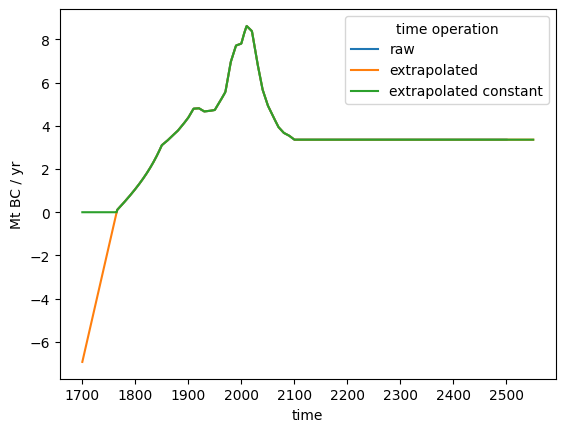

In [15]:
# NBVAL_IGNORE_OUTPUT
pdf = run_append([rcp26, rcp26_extrap, rcp26_extrap_const])

pdf.filter(variable=var_to_plot).lineplot(hue="time operation")

If we try to extrapolate beyond our source data but set `extrapolation_type=None`, we will receive an `InsufficientDataError`.

In [16]:
try:
    rcp26.interpolate(
        target_times=sorted([dt.datetime(v, 7, 1) for v in range(1700, 2551)]),
        extrapolation_type=None,
    )
except scmdata.time.InsufficientDataError:
    traceback.print_exc(limit=0, chain=False)

scmdata.errors.InsufficientDataError: Target time points are outside the source time points, use an extrapolation type other than None


Generally the `interpolate` requires at minimum 3 times in order to perform any interpolation/extrapolation, otherwise an `InsufficientDataError` is raised. There is a special case where `constant` extrapolation can be used on a single time-step.

In [17]:
rcp26_yr2000 = rcp26.filter(year=2000)
rcp26_extrap_const_single = rcp26_yr2000.interpolate(
    target_times=sorted([dt.datetime(v, 7, 1) for v in range(1700, 2551)]),
    extrapolation_type="constant",
)
rcp26_extrap_const_single["time operation"] = "extrapolated constant"
rcp26_extrap_const_single.head()

time                                                                       1700-07-01 00:00:00  1701-07-01 00:00:00  \
model region scenario time operation        unit          variable                                                    
IMAGE World  RCP26    extrapolated constant Mt BC / yr    Emissions|BC                  7.8048               7.8048   
                                            kt C2F6 / yr  Emissions|C2F6                2.3749               2.3749   
                                            kt C6F14 / yr Emissions|C6F14               0.4624               0.4624   
                                            kt CCl4 / yr  Emissions|CCl4               74.1320              74.1320   
                                            kt CF4 / yr   Emissions|CF4                12.0001              12.0001   

time                                                                       1702-07-01 00:00:00  1703-07-01 00:00:00  \
model region scenario time operation        unit          variable                                                    
IMAGE World  RCP26    extrapolated constant Mt BC / yr    Emissions|BC                  7.8048               7.8048   
                                            kt C2F6 / yr  Emissions|C2F6                2.3749               2.3749   
                                            kt C6F14 / yr Emissions|C6F14               0.4624               0.4624   
                                            kt CCl4 / yr  Emissions|CCl4               74.1320              74.1320   
                                            kt CF4 / yr   Emissions|CF4                12.0001              12.0001   

time                                                                       1704-07-01 00:00:00  1705-07-01 00:00:00  \
model region scenario time operation        unit          variable                                                    
IMAGE World  RCP26    extrapolated constant Mt BC / yr    Emissions|BC                  7.8048               7.8048   
                                            kt C2F6 / yr  Emissions|C2F6                2.3749               2.3749   
                                            kt C6F14 / yr Emissions|C6F14               0.4624               0.4624   
                                            kt CCl4 / yr  Emissions|CCl4               74.1320              74.1320   
                                            kt CF4 / yr   Emissions|CF4                12.0001              12.0001   

time                                                                       1706-07-01 00:00:00  ...  \
model region scenario time operation        unit          variable                              ...   
IMAGE World  RCP26    extrapolated constant Mt BC / yr    Emissions|BC                  7.8048  ...   
                                            kt C2F6 / yr  Emissions|C2F6                2.3749  ...   
                                            kt C6F14 / yr Emissions|C6F14               0.4624  ...   
                                            kt CCl4 / yr  Emissions|CCl4               74.1320  ...   
                                            kt CF4 / yr   Emissions|CF4                12.0001  ...   

time                                                                       2544-07-01 00:00:00  2545-07-01 00:00:00  \
model region scenario time operation        unit          variable                                                    
IMAGE World  RCP26    extrapolated constant Mt BC / yr    Emissions|BC                  7.8048               7.8048   
                                            kt C2F6 / yr  Emissions|C2F6                2.3749               2.3749   
                                            kt C6F14 / yr Emissions|C6F14               0.4624               0.4624   
                                            kt CCl4 / yr  Emissions|CCl4               74.1320              74.1320   
                                            kt CF4 / yr   Emis

## Time means

With monthly data, we can then take time means. Most of the time we just want to take the annual mean. This can be done as shown below.

### Annual mean

In [18]:
rcp26_annual_mean = rcp26_monthly.time_mean("AC")
rcp26_annual_mean["time operation"] = "annual mean"
rcp26_annual_mean.head()

time                                                                1765-07-01 00:00:00  1766-07-01 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    annual mean    Mt BC / yr    Emissions|BC                0.035676             0.111128   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010759             0.010751   

time                                                                1767-07-01 00:00:00  1768-07-01 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    annual mean    Mt BC / yr    Emissions|BC                0.139999             0.166494   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010747             0.010743   

time                                                                1769-07-01 00:00:00  1770-07-01 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    annual mean    Mt BC / yr    Emissions|BC                0.193071             0.219724   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010739             0.010735   

time                                                                1771-07-01 00:00:00  ...  2494-07-01 00:00:00  \
model region scenario time operation unit          variable                              ...                        
IMAGE World  RCP26    annual mean    Mt BC / yr    Emissions|BC                0.246444  ...               3.3578   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000  ...               0.0857   
                                     kt C6F14 / yr Emissions|C6F14             0.000000  ...               0.0887   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000  ...               0.0000   
                                     kt CF4 / yr   Emissions|CF4               0.010730  ...               1.0920   

time                                                                2495-07-01 00:00:00  2496-07-01 00:00:00  \
model region scenario time operation unit          variable                                                    
IMAGE World  RCP26    annual mean    Mt BC / yr    Emissions|BC                  3.3578               3.3578   
                                     kt C2F6 / yr  Emissions|C2F6                0.0857               0.0857   
                                     kt C6F14 / yr Emissions|C6F14               0.0887               0.0887   
                                     kt CCl4 / yr  Emissions|CCl4                0.0000               0.0000   
                                     kt CF4 / yr   Emissions|CF4                 1.0920               1.0920   

time                                    

As the data is an annual mean, we put it in July 1st (which is more or less the centre of the year).

### Annual mean centred on January 1st

Sometimes we want to take annual means centred on January 1st, rather than the middle of the year. This can be done as shown.

In [19]:
rcp26_annual_mean_jan_1 = rcp26_monthly.time_mean("AS")
rcp26_annual_mean_jan_1["time operation"] = "annual mean Jan 1"
rcp26_annual_mean_jan_1.head()

time                                                                   1765-01-01 00:00:00  1766-01-01 00:00:00  \
model region scenario time operation    unit          variable                                                    
IMAGE World  RCP26    annual mean Jan 1 Mt BC / yr    Emissions|BC                0.008794             0.077819   
                                        kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                        kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                        kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                        kt CF4 / yr   Emissions|CF4               0.010762             0.010755   

time                                                                   1767-01-01 00:00:00  1768-01-01 00:00:00  \
model region scenario time operation    unit          variable                                                    
IMAGE World  RCP26    annual mean Jan 1 Mt BC / yr    Emissions|BC                0.126805             0.153223   
                                        kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                        kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                        kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                        kt CF4 / yr   Emissions|CF4               0.010749             0.010745   

time                                                                   1769-01-01 00:00:00  1770-01-01 00:00:00  \
model region scenario time operation    unit          variable                                                    
IMAGE World  RCP26    annual mean Jan 1 Mt BC / yr    Emissions|BC                0.179777             0.206387   
                                        kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                        kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                        kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                        kt CF4 / yr   Emissions|CF4               0.010741             0.010737   

time                                                                   1771-01-01 00:00:00  ...  2494-01-01 00:00:00  \
model region scenario time operation    unit          variable                              ...                        
IMAGE World  RCP26    annual mean Jan 1 Mt BC / yr    Emissions|BC                0.233081  ...               3.3578   
                                        kt C2F6 / yr  Emissions|C2F6              0.000000  ...               0.0857   
                                        kt C6F14 / yr Emissions|C6F14             0.000000  ...               0.0887   
                                        kt CCl4 / yr  Emissions|CCl4              0.000000  ...               0.0000   
                                        kt CF4 / yr   Emissions|CF4               0.010732  ...               1.0920   

time                                                                   2495-01-01 00:00:00  2496-01-01 00:00:00  \
model region scenario time operation    unit          variable                                                    
IMAGE World  RCP26    annual mean Jan 1 Mt BC / yr    Emissions|BC                  3.3578               3.3578   
                                        kt C2F6 / yr  Emissions|C2F6                0.0857               0.0857   
                                        kt C6F14 / yr Emissions|C6F14               0.0887               0.0887   
                                        kt CCl4 / yr  Emissions|CCl4                0.0000               0.0000   
                                        kt CF4 / yr

As the data is centred on January 1st, we put it in January 1st.

### Annual mean centred on December 31st

Sometimes we want to take annual means centred on December 31st, rather than the middle of the year. This can be done as shown.

In [20]:
rcp26_annual_mean_dec_31 = rcp26_monthly.time_mean("A")
rcp26_annual_mean_dec_31["time operation"] = "annual mean Dec 31"
rcp26_annual_mean_dec_31.head()

time                                                                    1764-12-31 00:00:00  1765-12-31 00:00:00  \
model region scenario time operation     unit          variable                                                    
IMAGE World  RCP26    annual mean Dec 31 Mt BC / yr    Emissions|BC                0.008794             0.077819   
                                         kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                         kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                         kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                         kt CF4 / yr   Emissions|CF4               0.010762             0.010755   

time                                                                    1766-12-31 00:00:00  1767-12-31 00:00:00  \
model region scenario time operation     unit          variable                                                    
IMAGE World  RCP26    annual mean Dec 31 Mt BC / yr    Emissions|BC                0.126805             0.153223   
                                         kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                         kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                         kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                         kt CF4 / yr   Emissions|CF4               0.010749             0.010745   

time                                                                    1768-12-31 00:00:00  1769-12-31 00:00:00  \
model region scenario time operation     unit          variable                                                    
IMAGE World  RCP26    annual mean Dec 31 Mt BC / yr    Emissions|BC                0.179777             0.206387   
                                         kt C2F6 / yr  Emissions|C2F6              0.000000             0.000000   
                                         kt C6F14 / yr Emissions|C6F14             0.000000             0.000000   
                                         kt CCl4 / yr  Emissions|CCl4              0.000000             0.000000   
                                         kt CF4 / yr   Emissions|CF4               0.010741             0.010737   

time                                                                    1770-12-31 00:00:00  ...  2493-12-31 00:00:00  \
model region scenario time operation     unit          variable                              ...                        
IMAGE World  RCP26    annual mean Dec 31 Mt BC / yr    Emissions|BC                0.233081  ...               3.3578   
                                         kt C2F6 / yr  Emissions|C2F6              0.000000  ...               0.0857   
                                         kt C6F14 / yr Emissions|C6F14             0.000000  ...               0.0887   
                                         kt CCl4 / yr  Emissions|CCl4              0.000000  ...               0.0000   
                                         kt CF4 / yr   Emissions|CF4               0.010732  ...               1.0920   

time                                                                    2494-12-31 00:00:00  2495-12-31 00:00:00  \
model region scenario time operation     unit          variable                                                    
IMAGE World  RCP26    annual mean Dec 31 Mt BC / yr    Emissions|BC                  3.3578               3.3578   
                                         kt C2F6 / yr  Emissions|C2F6                0.0857               0.0857   
                                         kt C6F14 / yr Emissions|C6F14               0.0887               0.0887   
                                         kt CCl4 / yr  Emissions|CCl4                0.0000               0.0000   
                 

As the data is centred on December 31st, we put it in December 31st.

## Comparing the results

We can compare the impact of these different methods with a plot as shown below.

/Users/jared/code/uom/scmdata/src/scmdata/plotting.py:96: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.lineplot(data=plt_df, **kwargs)
/Users/jared/code/uom/scmdata/src/scmdata/plotting.py:96: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.lineplot(data=plt_df, **kwargs)


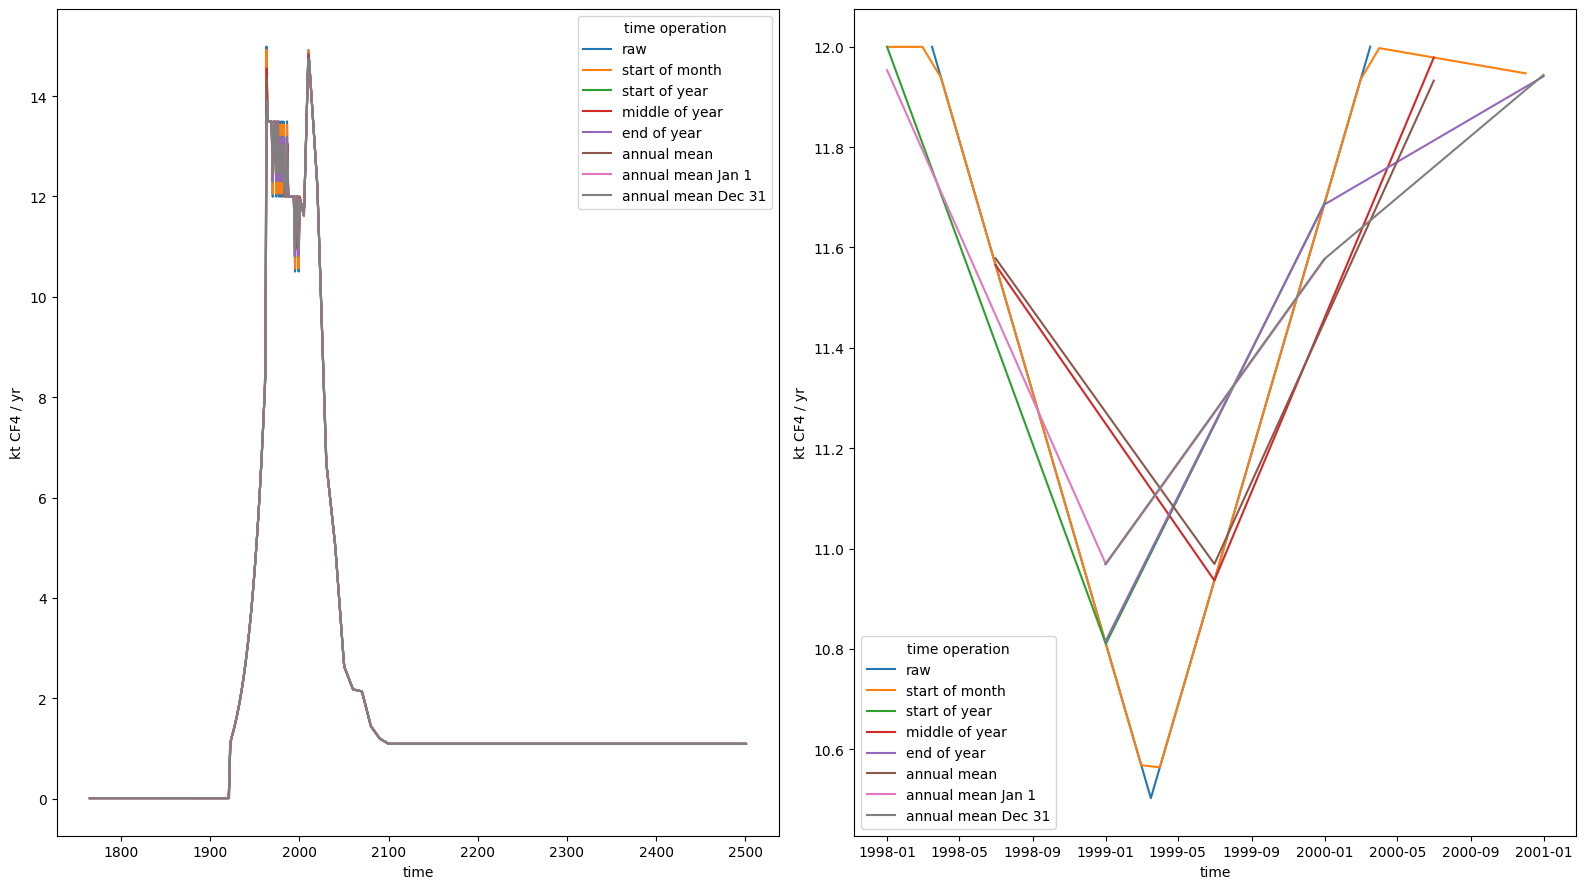

In [21]:
# NBVAL_IGNORE_OUTPUT
var_to_plot = "Emissions|CF4"
pdf = run_append(
    [
        rcp26,
        rcp26_monthly,
        rcp26_start_of_year,
        rcp26_middle_of_year,
        rcp26_end_of_year,
        rcp26_annual_mean,
        rcp26_annual_mean_jan_1,
        rcp26_annual_mean_dec_31,
    ]
)

fig = plt.figure(figsize=(16, 9))

ax = fig.add_subplot(121)
pdf.filter(variable=var_to_plot).lineplot(ax=ax, hue="time operation")

ax = fig.add_subplot(122)
pdf.filter(variable=var_to_plot, year=range(1998, 2001)).lineplot(
    ax=ax, hue="time operation"
)

plt.tight_layout()

When the timeseries is particularly noisy, the different operations result in slightly different timeseries. For example, shifting to start of month smooths the data a bit (as you're interpolating and resampling the underlying data) while taking means centred on different points in time changes your mean as you take different windows of your monthly data.

/Users/jared/code/uom/scmdata/src/scmdata/plotting.py:96: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.lineplot(data=plt_df, **kwargs)
/Users/jared/code/uom/scmdata/src/scmdata/plotting.py:96: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.lineplot(data=plt_df, **kwargs)


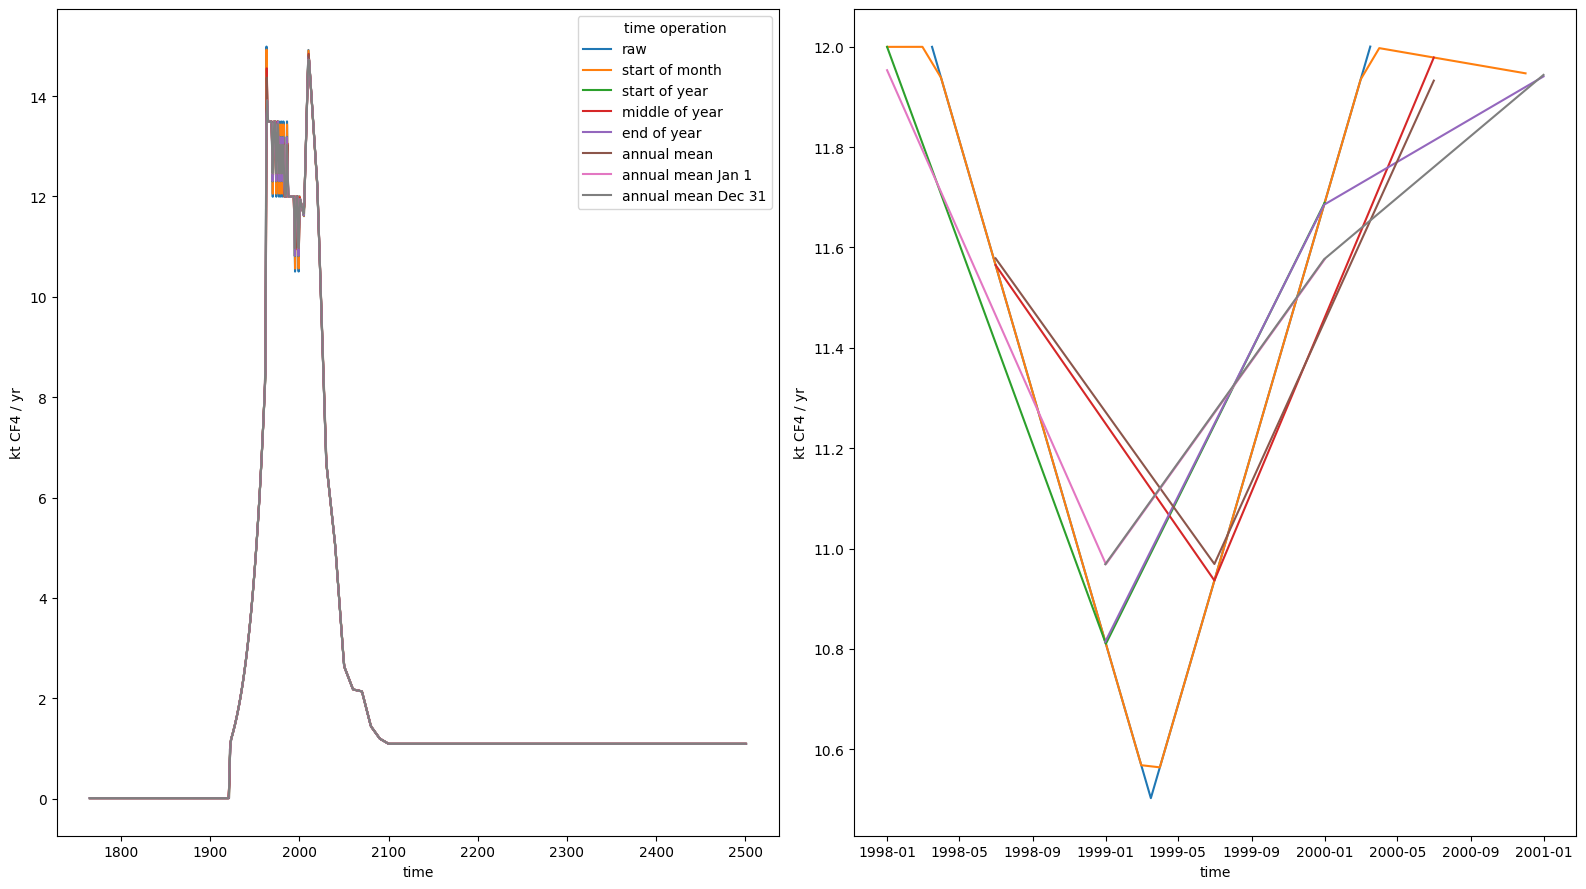

In [22]:
# NBVAL_IGNORE_OUTPUT
fig = plt.figure(figsize=(16, 9))

ax = fig.add_subplot(121)
pdf.filter(variable=var_to_plot).lineplot(ax=ax, hue="time operation")

ax = fig.add_subplot(122)
pdf.filter(variable=var_to_plot, year=range(1998, 2001)).lineplot(
    ax=ax, hue="time operation", legend=False
)

plt.tight_layout()

The lines above don't match the underlying timeseries e.g. the monthly data minimum is in the wrong place.

In [23]:
# NBVAL_IGNORE_OUTPUT
rcp26_monthly.filter(
    variable=var_to_plot, year=range(1998, 2001), month=[2, 3, 4, 5]
).timeseries()

,,,,,time,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1999-02-01,1999-03-01,1999-04-01,1999-05-01,2000-02-01,2000-03-01,2000-04-01,2000-05-01
model,region,scenario,time operation,unit,variable,,,,,,,,,,,,
IMAGE,World,RCP26,start of month,kt CF4 / yr,Emissions|CF4,11.999545,11.999564,11.938059,11.815028,10.683138,10.568309,10.564061,10.6868,11.815992,11.93464,11.997014,11.990841


<AxesSubplot:xlabel='time'>

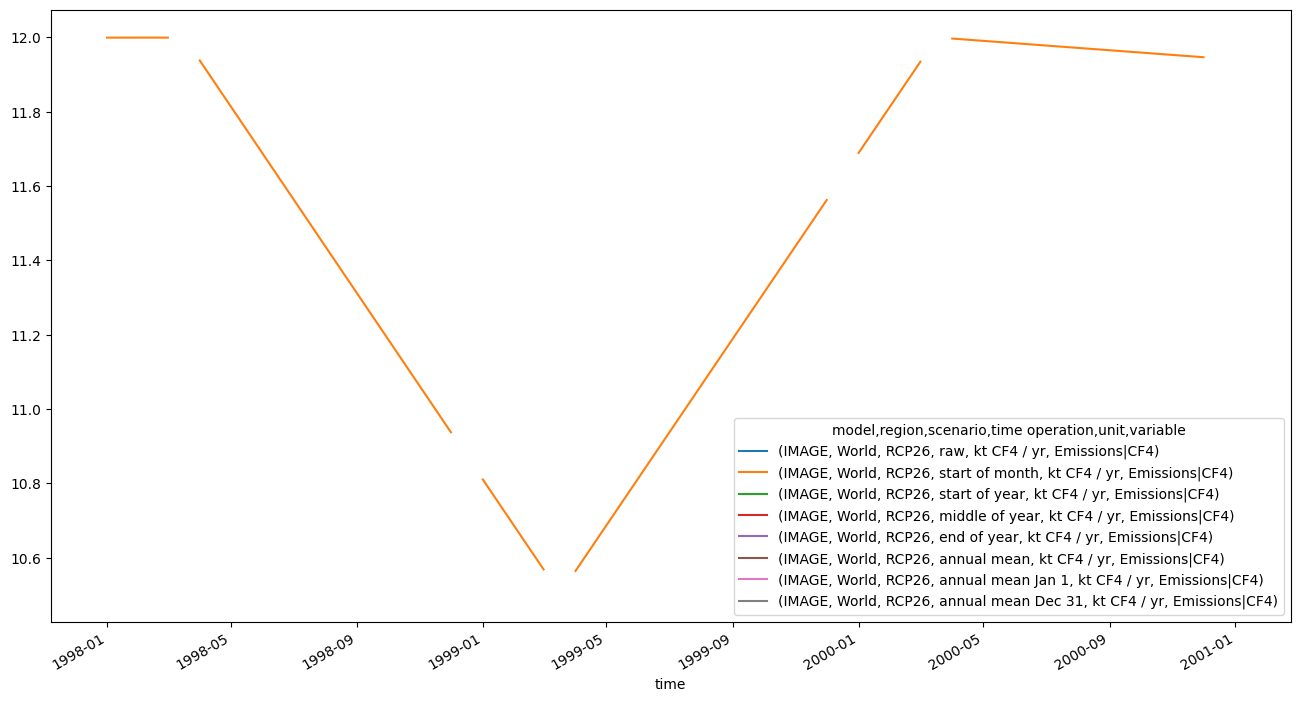

In [24]:
# NBVAL_IGNORE_OUTPUT
pdf.filter(variable=var_to_plot, year=range(1998, 2001)).timeseries().T.plot(
    figsize=(16, 9)
)

In [25]:
pdf.filter(variable=var_to_plot, year=range(1998, 2001)).timeseries().T.sort_index()

model                  IMAGE                                                                          \
region                 World                                                                           
scenario               RCP26                                                                           
time operation           raw start of month start of year middle of year   end of year   annual mean   
unit             kt CF4 / yr    kt CF4 / yr   kt CF4 / yr    kt CF4 / yr   kt CF4 / yr   kt CF4 / yr   
variable       Emissions|CF4  Emissions|CF4 Emissions|CF4  Emissions|CF4 Emissions|CF4 Emissions|CF4   
time                                                                                                   
1998-01-01               NaN      11.999523     11.999523            NaN           NaN           NaN   
1998-02-01               NaN      11.999545           NaN            NaN           NaN           NaN   
1998-03-01               NaN      11.999564           NaN            NaN           NaN           NaN   
1998-03-17         11.999575            NaN           NaN            NaN           NaN           NaN   
1998-04-01               NaN      11.938059           NaN            NaN           NaN           NaN   
1998-05-01               NaN      11.815028           NaN            NaN           NaN           NaN   
1998-06-01               NaN      11.687895           NaN            NaN           NaN           NaN   
1998-07-01               NaN      11.564864           NaN      11.564864           NaN     11.578184   
1998-08-01               NaN      11.437731           NaN            NaN           NaN           NaN   
1998-09-01               NaN      11.310599           NaN            NaN           NaN           NaN   
1998-10-01               NaN      11.187567           NaN            NaN           NaN           NaN   
1998-11-01               NaN      11.060435           NaN            NaN           NaN           NaN   
1998-12-01               NaN      10.937403           NaN            NaN           NaN           NaN   
1998-12-31               NaN            NaN           NaN            NaN     10.814372           NaN   
1999-01-01               NaN      10.810271     10.810271            NaN           NaN           NaN   
1999-02-01               NaN      10.683138           NaN            NaN           NaN           NaN   
1999-03-01               NaN      10.568309           NaN            NaN           NaN           NaN   
1999-03-17         10.502692            NaN           NaN            NaN           NaN           NaN   
1999-04-01               NaN      10.564061           NaN            NaN           NaN           NaN   
1999-05-01               NaN      10.686800           NaN            NaN           NaN           NaN   
1999-06-01               NaN      10.813629           NaN            NaN           NaN           NaN   
1999-07-01               NaN      10.936368           NaN      10.936368           NaN     10.969208   
1999-08-01               NaN      11.063197           NaN            NaN           NaN           NaN   
1999-09-01               NaN      11.190027           NaN            NaN           NaN           NaN   
1999-10-01               NaN      11.312765           NaN            NaN           NaN           NaN   
1999-11-01               NaN      11.439595           NaN            NaN           NaN           NaN   
1999-12-01               NaN      11.562333           NaN            NaN           NaN           NaN   
1999-12-31               NaN            NaN           NaN            NaN     11.685072           NaN   
2000-01-01               NaN      11.689163     11.689163            NaN           NaN           NaN   
2000-02-01               NaN      11.815992           NaN            NaN           NaN           NaN   
2000-03-01               NaN      11.934640           NaN            NaN           NaN           NaN   
2000-03-17         12.000100            NaN     